In [2]:
pip install mysql-connector-python

     ---------------------------------------- 0.0/527.0 kB ? eta -:--:--
      --------------------------------------- 10.2/527.0 kB ? eta -:--:--
      --------------------------------------- 10.2/527.0 kB ? eta -:--:--
     -- ---------------------------------- 30.7/527.0 kB 325.1 kB/s eta 0:00:02
     ---- -------------------------------- 61.4/527.0 kB 409.6 kB/s eta 0:00:02
     ---------- ------------------------- 153.6/527.0 kB 762.6 kB/s eta 0:00:01
     -------------------------------------  522.2/527.0 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 527.0/527.0 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   - -------------------------------------- 0.7/14.2 MB 20.8 MB/s eta 0:00:01
   ---- ----------------------------------- 1.6/14.2 MB 16.4 MB/s eta 0:00:01
   ------- -------------------------------- 2.5/14.2 MB 17.6 MB/s eta 0:00:01
   ---------- ----------------------------- 3.9/14.2 MB 20.4 MB/s eta 0:00:

In [3]:
import mysql.connector

In [4]:
from mysql.connector import Error

In [36]:
try:
    connection = mysql.connector.connect(host='localhost',database='project_ipl_schema', user='root',password='Northeastern@0923',  auth_plugin = 'mysql_native_password')
    if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version ", db_Info)
        
except Error as e:
    print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.0.34


In [37]:
#Correlated query
#Retrieve the player with the highest bid amount with their team name and their particular year
if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version ", db_Info)
            cursor = connection.cursor()
            cursor.execute("select database();")
            record = cursor.fetchone()
            print("Your connected to database: ", record)
            sql_select_Query = """
SELECT a.year, p.player_name, t.team_name, b1.bid_amount
FROM bid b1, auction a, player p, team t
WHERE b1.auction_id = a.auction_id
AND b1.player_id = p.player_id
AND b1.team_id = t.team_id
AND b1.bid_amount = (
    SELECT MAX(b2.bid_amount)
    FROM bid b2
    WHERE b2.auction_id = b1.auction_id
)
ORDER BY b1.auction_id;
"""
            cursor = connection.cursor()
            cursor.execute(sql_select_Query)
            records = cursor.fetchall()
            print()
            for row in records:
                print(row)

Connected to MySQL Server version  8.0.34
Your connected to database:  ('project_ipl_schema',)

(2018, 'Frank Franklin', 'Delhi Capitals', Decimal('150000000.00'))
(2019, 'Joshua Lyons', 'Mumbai Indians', Decimal('148000000.00'))
(2020, 'Anthony Vasquez', 'Mumbai Indians', Decimal('149000000.00'))
(2021, 'Gene Boyd', 'Chennai Super Kings', Decimal('148000000.00'))
(2021, 'Jonathan Rivera', 'Delhi Capitals', Decimal('148000000.00'))
(2022, 'John Turner', 'Delhi Capitals', Decimal('149000000.00'))
(2023, 'Marc King', 'Mumbai Indians', Decimal('145000000.00'))


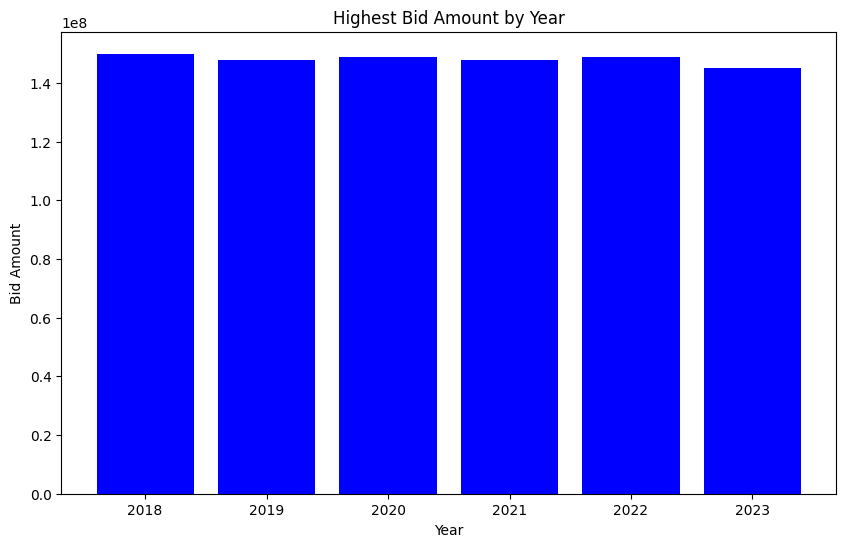

In [38]:
# Visualize the results
import matplotlib.pyplot as plt
years = [row[0] for row in records]
players = [row[1] for row in records]
teams = [row[2] for row in records]
bid_amounts = [row[3] for row in records]
plt.figure(figsize=(10, 6))
plt.bar(years, bid_amounts, color='blue')
plt.xlabel('Year')
plt.ylabel('Bid Amount')
plt.title('Highest Bid Amount by Year')
plt.show()

In [46]:
#JOIN
#Retrieve top 10 fielders 
if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version ", db_Info)
            cursor = connection.cursor()
            cursor.execute("select database();")
            record = cursor.fetchone()
            print("Your connected to database: ", record)
            sql_select_Query = """
SELECT f.player_id, p.player_name, f.no_of_catches, f.no_of_stumping,
f.no_of_run_out, f.no_of_catches+f.no_of_stumping+f.no_of_run_out as
total_wickets
FROM fielder f
JOIN player p
ON f.player_id = p.player_id
ORDER BY total_wickets DESC
LIMIT 10;
"""
            cursor = connection.cursor()
            cursor.execute(sql_select_Query)
            records = cursor.fetchall()
            print()
            for row in records:
                print(row)

Connected to MySQL Server version  8.0.34
Your connected to database:  ('project_ipl_schema',)

(49, 'James Martin', 46, 9, 20, 75)
(55, 'Henry Davenport', 50, 6, 18, 74)
(98, 'Larry Pacheco', 50, 3, 20, 73)
(247, 'Matthew Thomas', 47, 5, 18, 70)
(28, 'Richard Santiago', 48, 8, 12, 68)
(74, 'Louis Salas', 43, 5, 20, 68)
(211, 'Matthew Ashley', 39, 10, 18, 67)
(225, 'Bradley Matthews', 45, 2, 20, 67)
(238, 'James Ortiz', 43, 8, 16, 67)
(35, 'Keith Murray', 38, 10, 18, 66)


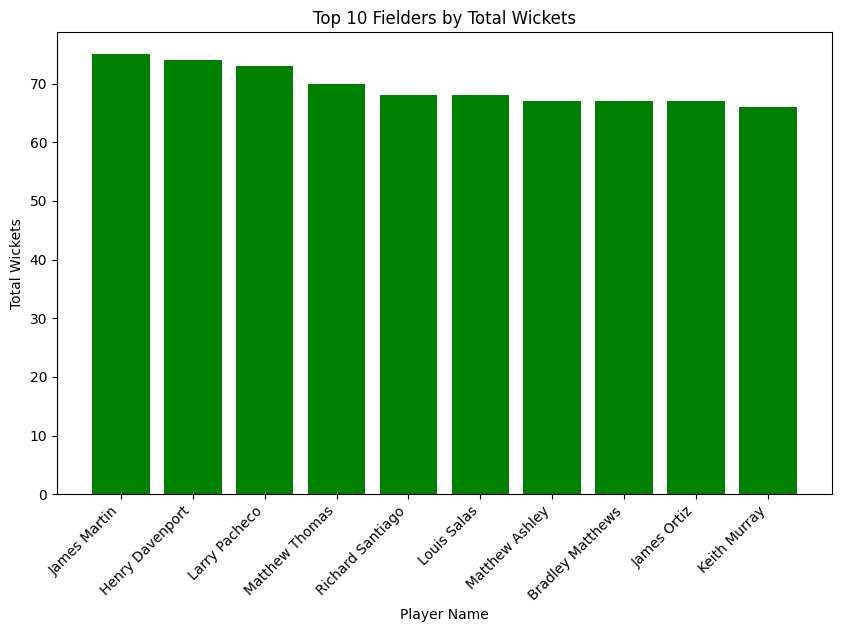

In [40]:
 # Visualize the results
player_names = [row[1] for row in records]
total_wickets = [row[5] for row in records]

plt.figure(figsize=(10, 6))
plt.bar(player_names, total_wickets, color='green')
plt.xlabel('Player Name')
plt.ylabel('Total Wickets')
plt.title('Top 10 Fielders by Total Wickets')
plt.xticks(rotation=45, ha='right')
plt.show()


In [41]:
#Aggregate
#Retrieve the average bid amount of each player
if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version ", db_Info)
            cursor = connection.cursor()
            cursor.execute("select database();")
            record = cursor.fetchone()
            print("Your connected to database: ", record)
            sql_select_Query = """
SELECT p.player_id,p.player_name,AVG(b.bid_amount)
FROM player p , bid b,auction a
WHERE p.player_id=b.player_id
AND a.auction_id=b.auction_id
GROUP BY b.player_id
ORDER BY player_id ASC;
"""
            cursor = connection.cursor()
            cursor.execute(sql_select_Query)
            records = cursor.fetchall()
            print()
            for row in records:
                print(row)

Connected to MySQL Server version  8.0.34
Your connected to database:  ('project_ipl_schema',)

(1, 'David Hayes', Decimal('10949498.500000'))
(2, 'Matthew Castillo', Decimal('45543055.333333'))
(3, 'Ricky Gordon', Decimal('110290871.000000'))
(4, 'Randall Jones', Decimal('78651326.000000'))
(5, 'David Sims', Decimal('66058347.000000'))
(7, 'Douglas Lewis', Decimal('22392788.000000'))
(8, 'Dennis Perry', Decimal('110292465.000000'))
(9, 'Anthony Watson', Decimal('76426282.000000'))
(10, 'James Barton', Decimal('129000000.000000'))
(11, 'Adrian Jackson', Decimal('109000000.000000'))
(12, 'James Tucker', Decimal('84192000.000000'))
(13, 'Gregory Richard', Decimal('72601598.500000'))
(14, 'Mark Nunez', Decimal('35507334.000000'))
(15, 'Timothy Hudson', Decimal('106000000.000000'))
(16, 'Frank Franklin', Decimal('92167747.600000'))
(17, 'Richard Mosley', Decimal('66208718.000000'))
(18, 'Marc King', Decimal('84481623.400000'))
(19, 'Jason Joyce', Decimal('58540118.000000'))
(21, 'Timothy H

In [42]:
#EXISTS
#Retrieving the players who has played all the seasons 
if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version ", db_Info)
            cursor = connection.cursor()
            cursor.execute("select database();")
            record = cursor.fetchone()
            print("Your connected to database: ", record)
            sql_select_Query = """
SELECT player_id,player_name
FROM player p
WHERE NOT EXISTS
( SELECT *
FROM auction a
WHERE NOT EXISTS
(SELECT *
FROM bid b
WHERE p.player_id=b.player_id
AND a.auction_id=b.auction_id));
"""
            cursor = connection.cursor()
            cursor.execute(sql_select_Query)
            records = cursor.fetchall()
            print()
            for row in records:
                print(row)

Connected to MySQL Server version  8.0.34
Your connected to database:  ('project_ipl_schema',)

(120, 'Vincent Welch')
(223, 'David Reid')


In [43]:
#NESTED QUERY
# Retrieving the team names who has got maximum number of wins
if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version ", db_Info)
            cursor = connection.cursor()
            cursor.execute("select database();")
            record = cursor.fetchone()
            print("Your connected to database: ", record)
            sql_select_Query = """
select team_name, no_of_wins
from team
where no_of_wins = (
			SELECT max(no_of_wins)
            FROM team
		);
"""
            cursor = connection.cursor()
            cursor.execute(sql_select_Query)
            records = cursor.fetchall()
            print()
            for row in records:
                print(row)

Connected to MySQL Server version  8.0.34
Your connected to database:  ('project_ipl_schema',)

('Mumbai Indians', 5)
('Chennai Super Kings', 5)


In [44]:
#SET OPERATION
#players specialized in batting and bowling alone
if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version ", db_Info)
            cursor = connection.cursor()
            cursor.execute("select database();")
            record = cursor.fetchone()
            print("Your connected to database: ", record)
            sql_select_Query = """
select player_id
from batsman
EXCEPT
select player_id
from bowler;
"""
            cursor = connection.cursor()
            cursor.execute(sql_select_Query)
            records = cursor.fetchall()
            print()
            for row in records:
                print(row)

Connected to MySQL Server version  8.0.34
Your connected to database:  ('project_ipl_schema',)

(2,)
(5,)
(10,)
(17,)
(22,)
(30,)
(33,)
(38,)
(45,)
(51,)
(61,)
(68,)
(75,)
(81,)
(83,)
(84,)
(87,)
(88,)
(95,)
(101,)
(105,)
(111,)
(112,)
(113,)
(127,)
(132,)
(153,)
(154,)
(157,)
(160,)
(162,)
(169,)
(170,)
(173,)
(174,)
(179,)
(180,)
(181,)
(183,)
(187,)
(193,)
(212,)
(214,)
(218,)
(226,)
(230,)
(233,)
(241,)
(248,)


In [45]:
#ALL/ANY
#player who has played highest no. of seasons
if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version ", db_Info)
            cursor = connection.cursor()
            cursor.execute("select database();")
            record = cursor.fetchone()
            print("Your connected to database: ", record)
            sql_select_Query = """
select player_id, count(distinct auction_id)
from bid
group by player_id
having count(player_id) >= ALL (SELECT count(*)
							FROM bid
                            GROUP BY player_id
                            );
"""
            cursor = connection.cursor()
            cursor.execute(sql_select_Query)
            records = cursor.fetchall()
            print()
            for row in records:
                print(row)

Connected to MySQL Server version  8.0.34
Your connected to database:  ('project_ipl_schema',)

(120, 6)
(223, 6)


#VISUALIZATIONS

In [48]:

#1
import pandas as pd
#Social media Influence for different teams

if connection.is_connected():
    sql_select_fan_engg_exp = """ select f.franchise_name, sum(fe.social_media_followers) as followers
                                from fan_engagement fe, franchise f
                                where f.franchise_id = fe.franchise_id
                                group by fe.franchise_id; """

res1_df = pd.read_sql(sql_select_fan_engg_exp,connection)
res1_df = res1_df.sort_values(by='followers', ascending=False)
res1_df

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_8888\1296100889.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res1_df = pd.read_sql(sql_select_fan_engg_exp,connection)


,franchise_name,followers
8,Royal Challengers Bangalore,1.425819e+09
1,Rajasthan Royals,1.291523e+09
5,Lucknow Super Giants,9.669780e+08
3,Chennai Super Kings,8.902477e+08
4,Sunrisers Hyderabad,6.815387e+08
9,Punjab Kings,5.994079e+08
0,Mumbai Indians,5.872030e+08
6,Delhi Capitals,4.652085e+08
7,Gujarat titans,4.048365e+08
2,Kolkata Knight Riders,3.540748e+08


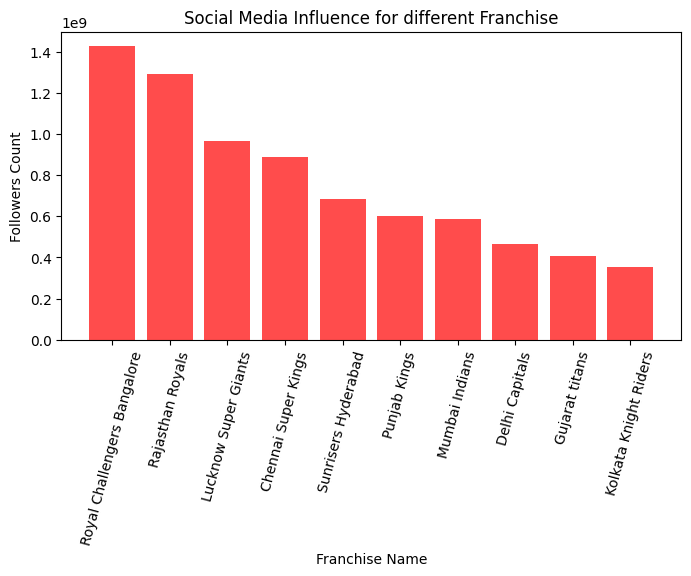

In [49]:
#Visualization of social media influence for different teams

plt.figure(figsize=(8, 4))
plt.bar(res1_df['franchise_name'], res1_df['followers'], color='red', alpha = 0.7)
plt.xlabel('Franchise Name')
plt.ylabel('Followers Count')
plt.xticks(res1_df['franchise_name'], rotation = 75)
plt.title('Social Media Influence for different Franchise')
plt.show()

In [50]:
#2

# Distribution of Players by Number of Seasons

if connection.is_connected():
    sql_select_player_season = """ select player_id, count(distinct auction_id) as no_of_seasons
                                from bid
                                group by player_id; """

res2_df = pd.read_sql(sql_select_player_season,connection)
res2_df

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_8888\845096208.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res2_df = pd.read_sql(sql_select_player_season,connection)


,player_id,no_of_seasons
0,1,2
1,2,3
2,3,1
3,4,2
4,5,1
...,...,...
216,244,3
217,246,1
218,247,1
219,248,3


In [51]:
value_counts = res2_df['no_of_seasons'].value_counts().sort_values(ascending=False)

print(value_counts)

no_of_seasons
2    85
1    82
3    38
4    10
5     4
6     2
Name: count, dtype: int64


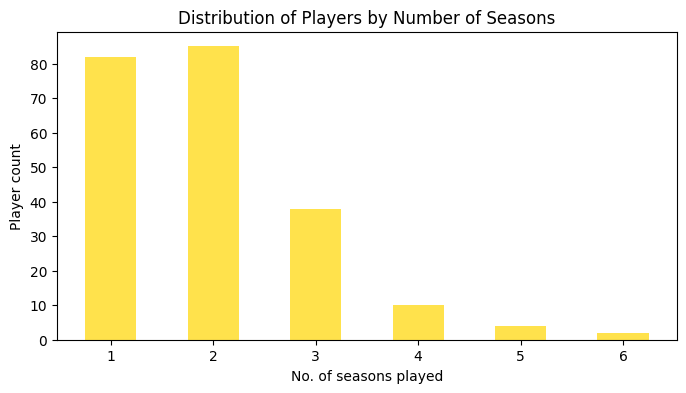

In [52]:
plt.figure(figsize=(8, 4))
plt.bar(value_counts.index, value_counts.values, color='gold', alpha = 0.7, width=0.5)
plt.xlabel('No. of seasons played')
plt.ylabel('Player count')

plt.title('Distribution of Players by Number of Seasons')
plt.show()

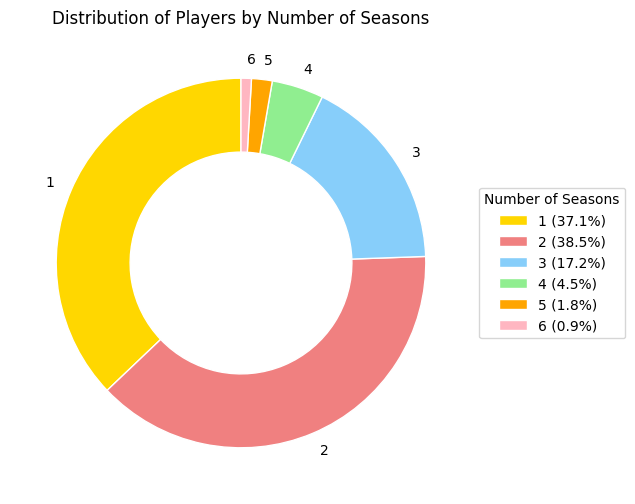

In [53]:
# Assuming value_counts is a pandas Series with index and values representing counts
value_counts = res2_df['no_of_seasons'].value_counts()

# Sort the value_counts by index (number of seasons)
value_counts = value_counts.sort_index()

# Define six different colors
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'lightpink']

# Create a larger figure with a stretched horizontal aspect ratio
plt.figure(figsize=(8, 6))

# Create a pie chart without percentages
patches, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='', startangle=90, colors=colors,
                                    wedgeprops=dict(width=0.4, edgecolor='w'), pctdistance=0.85)

# Combine legend labels and percentages rounded to 1 decimal place
legend_labels = [f'{label} ({round(value, 1)}%)' for label, value in zip(value_counts.index, value_counts / value_counts.sum() * 100)]

# Add a legend outside the pie chart with adjusted bbox_to_anchor
plt.legend(patches, legend_labels, title='Number of Seasons', bbox_to_anchor=(1, 0.5), loc="center left")

plt.title('Distribution of Players by Number of Seasons')

plt.show()

In [54]:
#3

#Total Amount Spent in IPL Auctions Over the Years

if (connection.is_connected()):
    sql_select_budget = """ SELECT year, total_amount 
                                FROM auction 
                                ORDER BY year; """

res3_df = pd.read_sql(sql_select_budget, connection)
res3_df

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_8888\2911416887.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res3_df = pd.read_sql(sql_select_budget, connection)


,year,total_amount
0,2018,1.067572e+09
1,2019,1.898573e+09
2,2020,1.829095e+09
3,2021,1.042303e+09
4,2022,1.139097e+09
5,2023,1.280555e+09


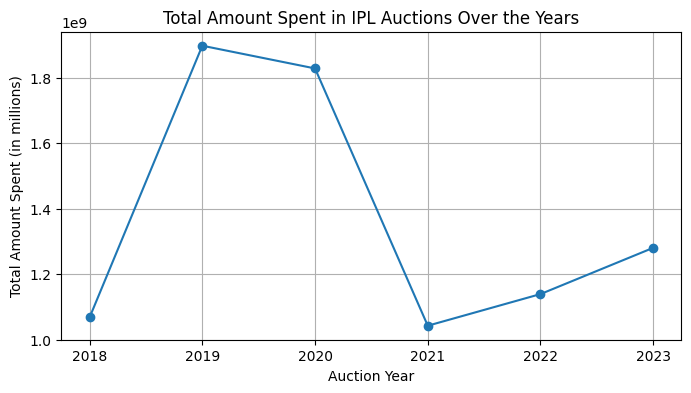

In [55]:
#Visualization of Total Amount Spent in IPL Auctions Over the Years

plt.figure(figsize=(8, 4))
plt.plot(res3_df['year'], res3_df['total_amount'], marker='o', linestyle='-')
plt.xlabel('Auction Year')
plt.ylabel('Total Amount Spent (in millions)')
plt.title('Total Amount Spent in IPL Auctions Over the Years')
plt.grid(True)
plt.show()

In [70]:
#4.
if connection.is_connected():
            sql_select_query= """
  SELECT player_id, batsman_id, bowler_id
                    FROM all_rounder;
"""
# Execute the query and fetch the data into a DataFrame
all_rounder_df = pd.read_sql_query(sql_select_query, connection)
all_rounder_df

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_8888\3787369013.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_rounder_df = pd.read_sql_query(sql_select_query, connection)


,player_id,batsman_id,bowler_id
0,1,1.0,1.0
1,2,2.0,NaN
2,3,3.0,2.0
3,4,NaN,3.0
4,5,4.0,NaN
...,...,...,...
245,246,NaN,166.0
246,247,149.0,167.0
247,248,150.0,NaN
248,249,NaN,168.0


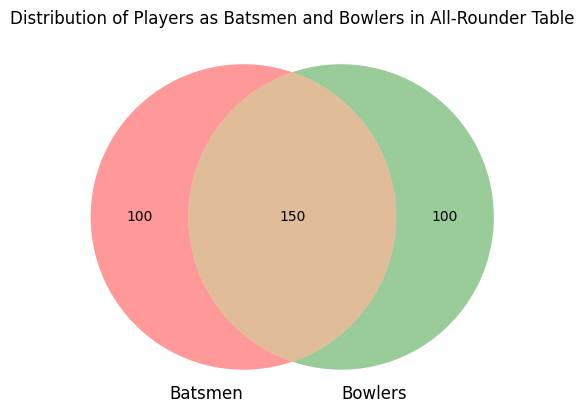

In [74]:
# Visualize the distribution using a Venn diagram
from matplotlib_venn import venn2
set1 = set(all_rounder_df['batsman_id'])
set2 = set(all_rounder_df['bowler_id'])

venn2([set1, set2], set_labels=('Batsmen', 'Bowlers'))
plt.title('Distribution of Players as Batsmen and Bowlers in All-Rounder Table')
plt.show()

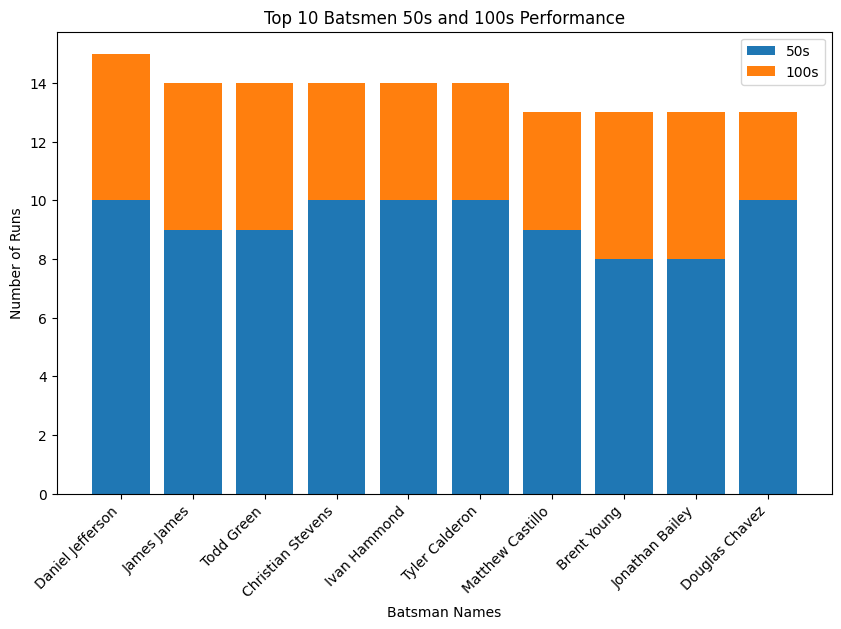

In [83]:
#5.
if connection.is_connected():
    query = """
                    SELECT p.player_name, b.no_of_50s, b.no_of_100s
                    FROM batsman b
                    JOIN player p ON b.player_id = p.player_id
                    ORDER BY (b.no_of_50s + b.no_of_100s) DESC
                    LIMIT 10;
                """
    cursor.execute(query)

     # Fetch all the records
    records = cursor.fetchall()
    # Prepare data for visualization
    batsman_names = [row[0] for row in records]
    no_of_50s = [row[1] for row in records]
    no_of_100s = [row[2] for row in records]

  # Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(batsman_names, no_of_50s, label='50s')
plt.bar(batsman_names, no_of_100s, bottom=no_of_50s, label='100s')
plt.xlabel('Batsman Names')
plt.ylabel('Number of Runs')
plt.title('Top 10 Batsmen 50s and 100s Performance')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()         

In [ ]:
if (connection.is_connected()):
    cursor.close()
    connection.close()
    print("MySQL connection is closed")     